# DRFPMI frequency response* 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as sig
import os
plt_style_dir = 'stash/'
if os.path.isdir(plt_style_dir) == True:
    plt.style.use(plt_style_dir + 'ppt2latexsubfig.mplstyle')
plt.rcParams["font.family"] = "Times New Roman"

Up to this point we can understand how the FPMI repsonse function works:
$$ H_{FPMI}(\omega_g) = \frac{2 \Delta \phi_r(\omega_g)}{h(\omega_g)} =  \frac{t_1^2r_2}{(t_1^2 + r_1^2)r_2 -r_1} \frac{H_{\mathrm{MI}}(\omega_g, L)}{1-r_1r_2e^{-2i \omega_g L /c }}  $$

In [2]:
# Some parameters
cee = np.float64(299792458)
OMEG = np.float64(2*np.pi*cee/(1064.0*10-9))
L = np.float64(4000.0)
nu = np.arange(1, 1000000, 1)
nat_nu = [np.float64(i*2*np.pi) for i in nu]
h_0 = np.float64(1)

T_1 = 10e-3
#T_1 = 25e-6 
T_2 = 50e-6
R_1 = 1-T_1
R_2 = 1-T_2

t_1 = T_1**.5
r_1 = R_1**.5
r_2 = R_2**.5 

# POWER RECYCLING

## Derivation
With all the power going to the symmetric port, the nominal operating state of the FPMI involves a significant amount of dumped / wasted power. Placing a mirror at the symmetric port can allow that power to be recycled. Though considerations must be made to maximize the amount of recycling gain you can acquire with your GW detector. This is dependent on the placement of the power recycling mirror (PRM) and its  reflectivity, transmission, and loss coefficients. 

But first, the field at the symmetric port:

$$E_\mathrm{SYM} = \frac{E_i}{2}e^{2ikl}(r_\mathrm{FP,X} + r_\mathrm{FP,Y}) $$

This is realized through observing the circulating power between the PRM and the short Michelson:

$$ E_\mathrm{PRC} = \frac{t_\mathrm{PRM}}{1- r_\mathrm{PRM} r_\mathrm{FPMI} e^{2ik (L_\mathrm{PRC2BS} + L_\mathrm{SMICH})}}E_\mathrm{in} $$ 

Where:

$$ L_\mathrm{SMICH} = l_x + l_y $$ 



Now let's observe the cavity reflection parameter:

$$ r_\mathrm{FP} = -r_1 + \frac{t_1^2 r_2 e^{i2kL}}{1-r_1 r_2 e^{i2kL}} = -\frac{\mathcal{F}}{\pi} \Big[-\Big(\frac{r_1}{r_2} \Big)^{1/2} + \Big(\frac{r_2}{r_1}\Big)^{1/2} (r_1^2 + t_1^2) \Big]$$


But with loss considerations:

$$ r_\mathrm{FP} = -r_1 + \frac{t_1^2 r_2 e^{- t_\mathrm{RT}/\tau_\mathrm{loss}}  e^{i2kL}}{1-r_1 r_2 e^{- t_\mathrm{RT}/\tau_\mathrm{loss}} e^{i2kL}} \approx -\frac{\mathcal{F}}{\pi} \Big[\frac{-r_1 +  r_2(r_1^2 + t_1^2)(1-\mathscr{L}_\mathrm{RT})}{\sqrt{r_1 r_2}} \Big]$$


we know that $t_1^2 << r_1^2$: 

$$r_\mathrm{FP} \approx -\frac{\mathcal{F}}{\pi} \Big[ \frac{r_1(-1 + (1 - \pi/\mathcal{F}) (1- \mathscr{L}_\mathrm{RT}))}{\sqrt{r_1 r_2}} \Big] \approx  -\Big(\frac{r_1}{r_2}\Big)^{1/2} \frac{\mathcal{F}}{\pi} \Big[- \pi/\mathcal{F} - \mathscr{L}_\mathrm{RT} + (\mathscr{L}_\mathrm{RT}\pi)/\mathcal{F}) \Big] $$

And $\mathscr{L}_\mathrm{RT} <<1$ with $r_1 /r_2 \approx 1$ we get:

$$r_\mathrm{FP} \approx -1 + \frac{\mathcal{F}}{\pi} \mathscr{L}_\mathrm{RT}$$

If we're operating at a dark fringe, at the symmetric port we see superimposed fields:

$$ E_\mathrm{SYM}  = \frac{E_i}{2} \Big[ r_\mathrm{FPX}e^{2ik\mathscr{l}_x} + r_\mathrm{FPY}e^{2ik\mathscr{l}_y} \Big] $$

Where we assume that the short Michelson arms and reflection coefficients are roughly equal ($\mathscr{l}_x = \mathscr{l}_y$, $r_\mathrm{FPX} = r_\mathrm{FPY}$)

We also can average the short Michelson arm lengths $(\mathscr{l}_x + \mathscr{l}_y)/2$ such that the effective reflection coefficient is:
$r_\mathrm{FPMI} = e^{2ik\mathscr{l}}(- 1 + \frac{\mathcal{F}}{\pi} \mathscr{L}_\mathrm{RT})$

Knowing this we create the following expression for the circulating power within the cavity:

$$ P_\mathrm{PRC} = \frac{|t_\mathrm{PRM}|^2}{|1-r_\mathrm{PRM} r_\mathrm{FPMI} e^{2ik(L_\mathrm{PRC2BS} + L_\mathrm{SMICH})}|^2} P_\mathrm{in}$$

where $|t_\mathrm{PRM}|^2 = 1 - |r_\mathrm{PRM}|^2 $ and given a carrier resonance condition we want to maximize the power with a variable PRM reflectivity:

$$\frac{\partial P_\mathrm{PRC}}{\partial r_\mathrm{PRM}} = \frac{2r_\mathrm{PRM}^2(r_\mathrm{FPMI} - r_\mathrm{PRM})}{(1 - r_\mathrm{PRM} r_\mathrm{FPMI})^3} = 0$$

which sets $ r_\mathrm{PRM} = r_\mathrm{FPMI} $ 

On resonance, the power recyling gain ($G_\mathrm{PR} = \frac{P_\mathrm{PRC}}{P_\mathrm{in}}$):

$$ G_\mathrm{PR} = \frac{\pi}{2 \mathcal{F} \mathscr{L}_\mathrm{RT}} \Bigg[ \frac{1}{1- \frac{\mathcal{F}\mathscr{L}_\mathrm{RT}}{2 \pi}} \Bigg] $$

In [3]:
r_FPMI = -r_1 + (T_1*r_2)/(1-r_1*r_2)
r_PRM = r_FPMI
G_PRC = 1/(1-r_PRM*(r_FPMI))

In [4]:
L_rt = 75e-6
Finn = (np.pi*np.sqrt(r_1*r_2))/(1-r_1*r_2)
print(Finn)

622.0761313001925


In [5]:
r_FPMI_approx = (1 - Finn*L_rt/np.pi)

In [6]:
r_range = np.arange(.9,1,1/(2**16))

In [7]:
G_PRC_ = (1-(r_range)**2)/(1-r_range*(r_FPMI_approx))**2

In [8]:
G_PRC_opt = (np.pi/(2*Finn*L_rt))*(1/(1-(Finn*L_rt/(2*np.pi))))

Text(0, 0.5, '$G_\\mathrm{PRC}$ [arb]')

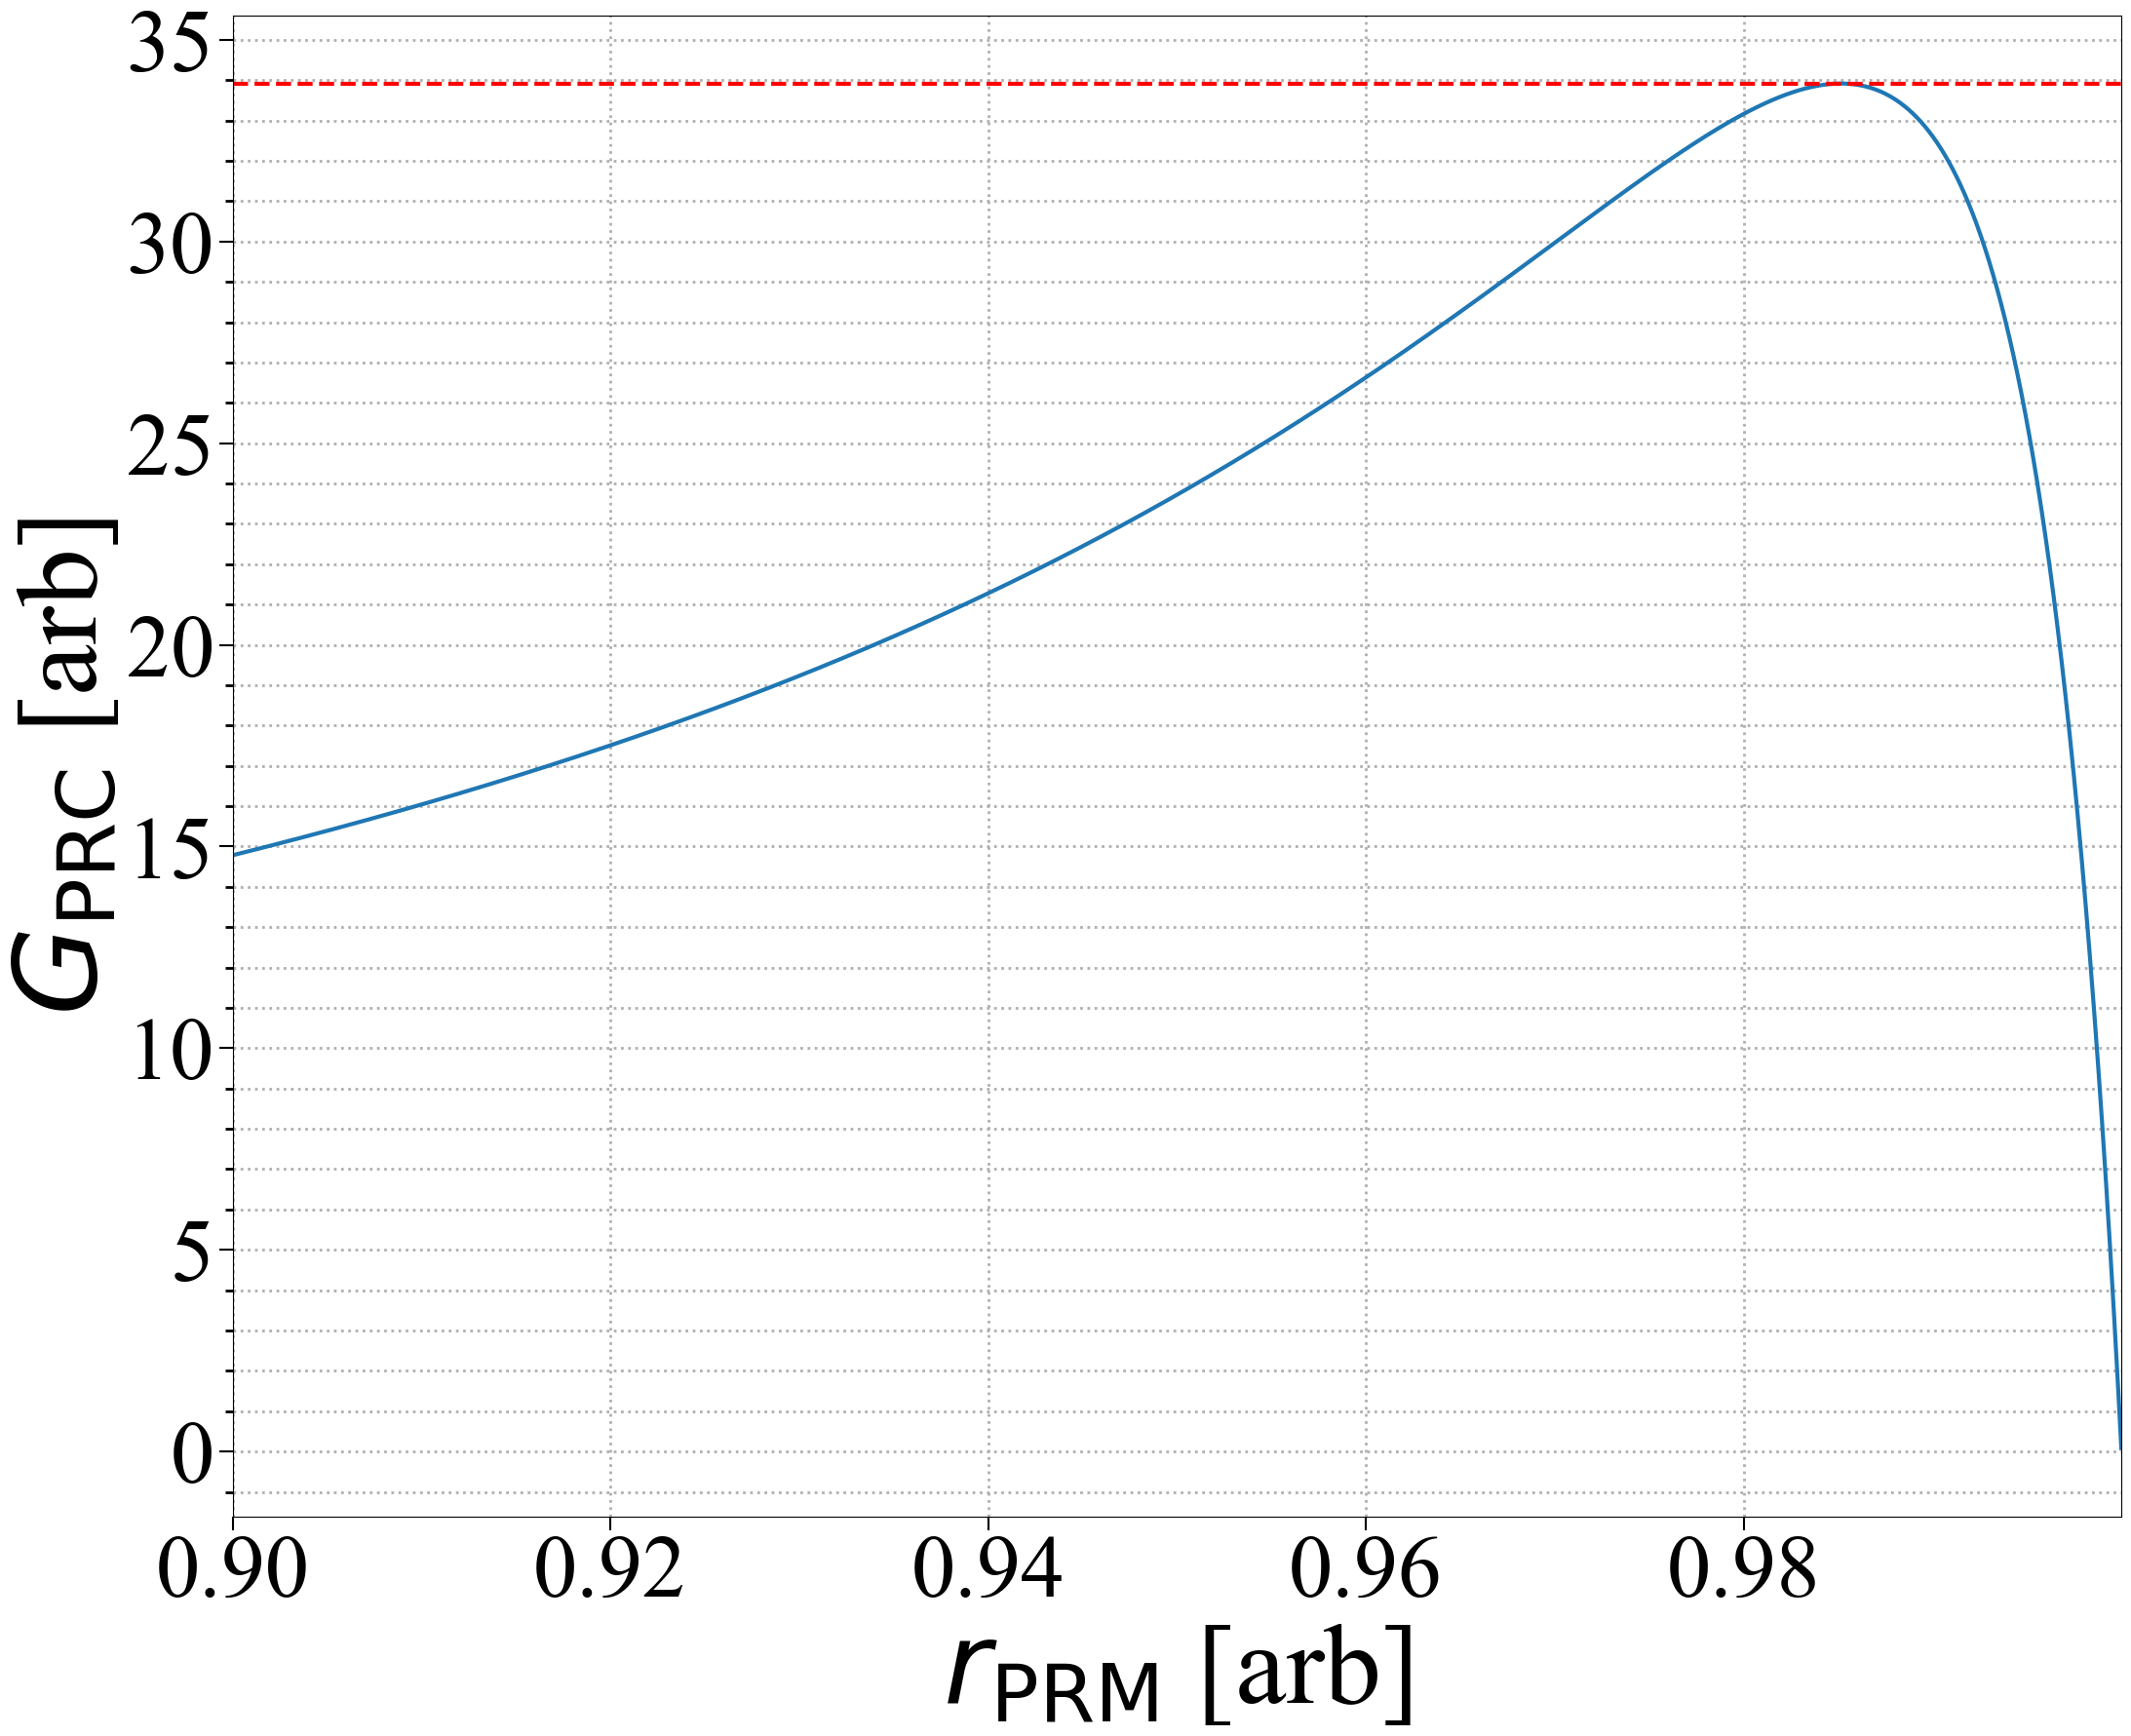

In [26]:
plt.plot(r_range, G_PRC_)
plt.axhline(G_PRC_opt, linestyle='--', color='r')
plt.xlim(r_range[0], r_range[-1])
plt.xlabel('$r_\mathrm{PRM}$ [arb]')
plt.ylabel('$G_\mathrm{PRC}$ [arb]')


In [11]:
const = (t_1**2 * r_2)/((t_1**2 + r_1**2)*r_2 - r_1)
def fpmi_freq_resp(freq, const, L, OMEGA):
    #return const*(h0*2.0*L*OMEGA*np.exp((-1j*L*2.0*np.pi*freq)/cee)*np.sin((L*2.0*np.pi*freq)/cee)/(L*2.0*np.pi*freq))/(1-r_1*r_2*np.exp(-1j*L*4.0*np.pi*freq/cee))
    return const*(2.0*L*OMEGA*np.exp((-1j*L*2.0*np.pi*freq)/cee)*np.sin((L*2.0*np.pi*freq)/cee)/(L*2.0*np.pi*freq))/(1-r_1*r_2*np.exp(-1j*L*4.0*np.pi*freq/cee))
H_FPMI = fpmi_freq_resp(nu, const, L, OMEG)

In [12]:
H_PRFPMI = G_PRC_opt*H_FPMI

We estimate the FP's pole frequency
$$  1 - r_1 r_2 e^{-2i \omega_g L / c} = 0 $$
therefore when:
$$ e^{-i \omega_g L / c} = \frac{1}{\sqrt{r_1 r_2}} $$
we acquire the pole frequency $\omega_\mathrm{pole}$ as indicated in the low pass
$$ f_\mathrm{pole} = \frac{1}{4\pi \tau_{s}} =  \frac{c}{4 \pi L} \frac{1- r_1 r_2}{\sqrt{r_1 r_2}} = \frac{\nu_\mathrm{FSR}}{2 \pi} \frac{1- r_1 r_2}{\sqrt{r_1 r_2}} = \frac{\nu_\mathrm{FSR}}{\mathcal{F}} $$

In [13]:
f_pole = 1/(((4*np.pi*L)*np.sqrt(r_1*r_2))/(cee*(1-r_1*r_2)))
def fpmi_lp(freq, cav_pole):
    return 1/(1 + 1j*(freq/cav_pole)) #*np.exp(1j*freq/cav_pole))
H_FPMI_LP = fpmi_lp(nu, f_pole)

Might as well compare it to our Michelson response: 
$$ H_{\mathrm{MI}}(\omega_g) = \frac{2 L \Omega}{c}e^{-i L \omega / c} \frac{\mathrm{sin}(L \omega /c)}{L \omega /c} $$

In [14]:
def mich_freq_resp(freq, L, OMEGA):
    return 2.0*L*OMEGA*np.exp((-1j*L*2.0*np.pi*freq)/cee)*np.sin((L*2.0*np.pi*freq)/cee)/(L*2.0*np.pi*freq)
H_MI = mich_freq_resp(nu, L, OMEG)

In [15]:
H_FPMI_modsq = np.real(H_FPMI)**2 + np.imag(H_FPMI)**2
H_MI_modsq = np.real(H_MI)**2 + np.imag(H_MI)**2
H_FPMI_LP_modsq=np.real(H_FPMI_LP)**2 + np.imag(H_FPMI_LP)**2
H_PRFPMI_modsq = np.real(H_PRFPMI)**2 + np.imag(H_PRFPMI)**2

Text(0, 0.5, 'phase [deg]')

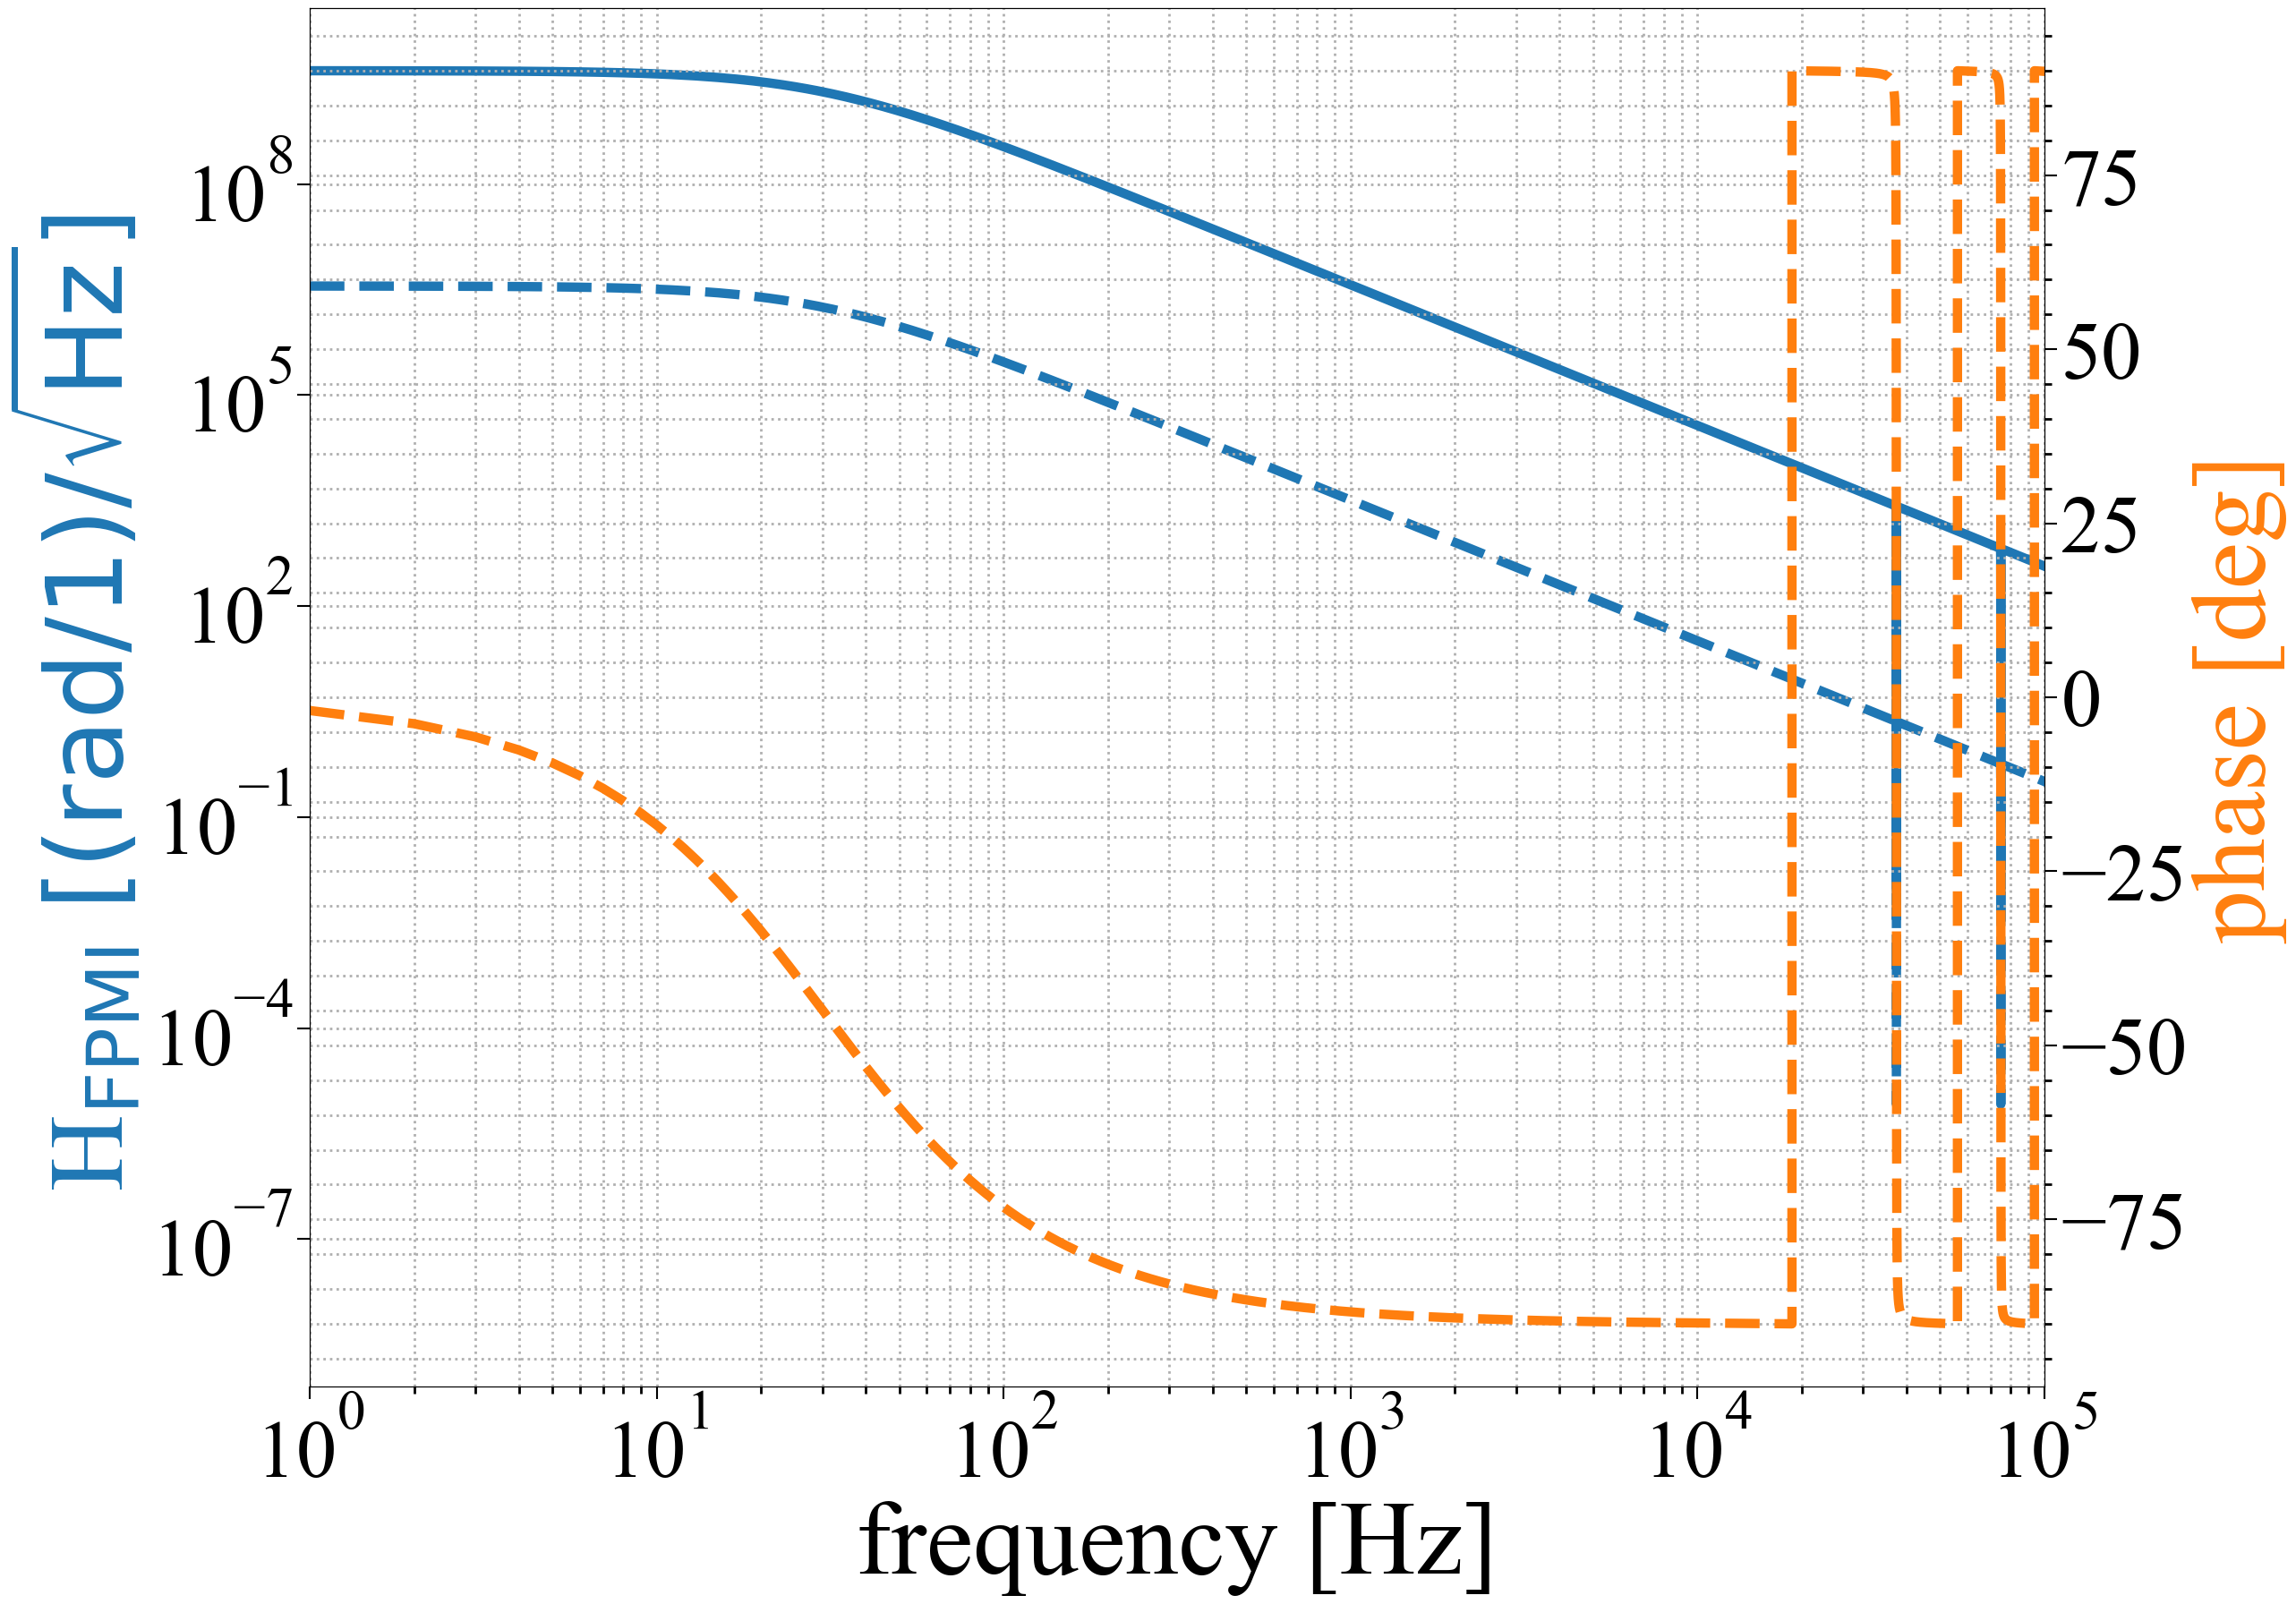

In [21]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('frequency [Hz]')
ax1.set_ylabel('H$_\mathrm{FPMI} \;  [(\mathrm{rad} / 1) / \sqrt{\mathrm{Hz}} ] $ ', color='C0')
#ax1.plot(w/(FSR), F_w_cc_modsq*100)
ax1.loglog(nu,H_FPMI_modsq, label='FPMI', linewidth=7.5, linestyle='--',color='C0')
ax1.loglog(nu,H_PRFPMI_modsq, label='PRFPMI',  linewidth=7.5,color='C0')
#ax1.loglog(w,H_MI_modsq, label= 'MICH', linewidth= 5)
#ax1.loglog(w,H_FPMI_LP_modsq*H_FPMI_modsq[0], label='FPMI LP', linewidth = 20.0, alpha=0.25,color='C2')
#ax1.axvline (x=f_pole,ymin=1e-13, color='red', linestyle='dotted', linewidth=3)
ax2 = ax1.twinx()
ax2.semilogx(nu,(180/np.pi)*np.arctan(np.imag(H_FPMI)/np.real(H_FPMI)),'--', linewidth=7.5, color='C1')
#ax2.semilogx(w,(180/np.pi)*np.arctan(np.imag(H_MI)/np.real(H_MI)), '--')
#ax2.semilogx(w,(180/np.pi)*np.arctan(np.imag(H_FPMI_LP)/np.real(H_FPMI_LP)),linestyle='--', linewidth=20.0,dashes=(4,10),alpha=.25, color='C2')
plt.xlim([1,1e5])
plt.ylabel('phase [deg]', color='C1')

In [11]:
fig.savefig('../figs/INTRO/prfpmi_fr.pdf', dpi=300, bbox_inches='tight')

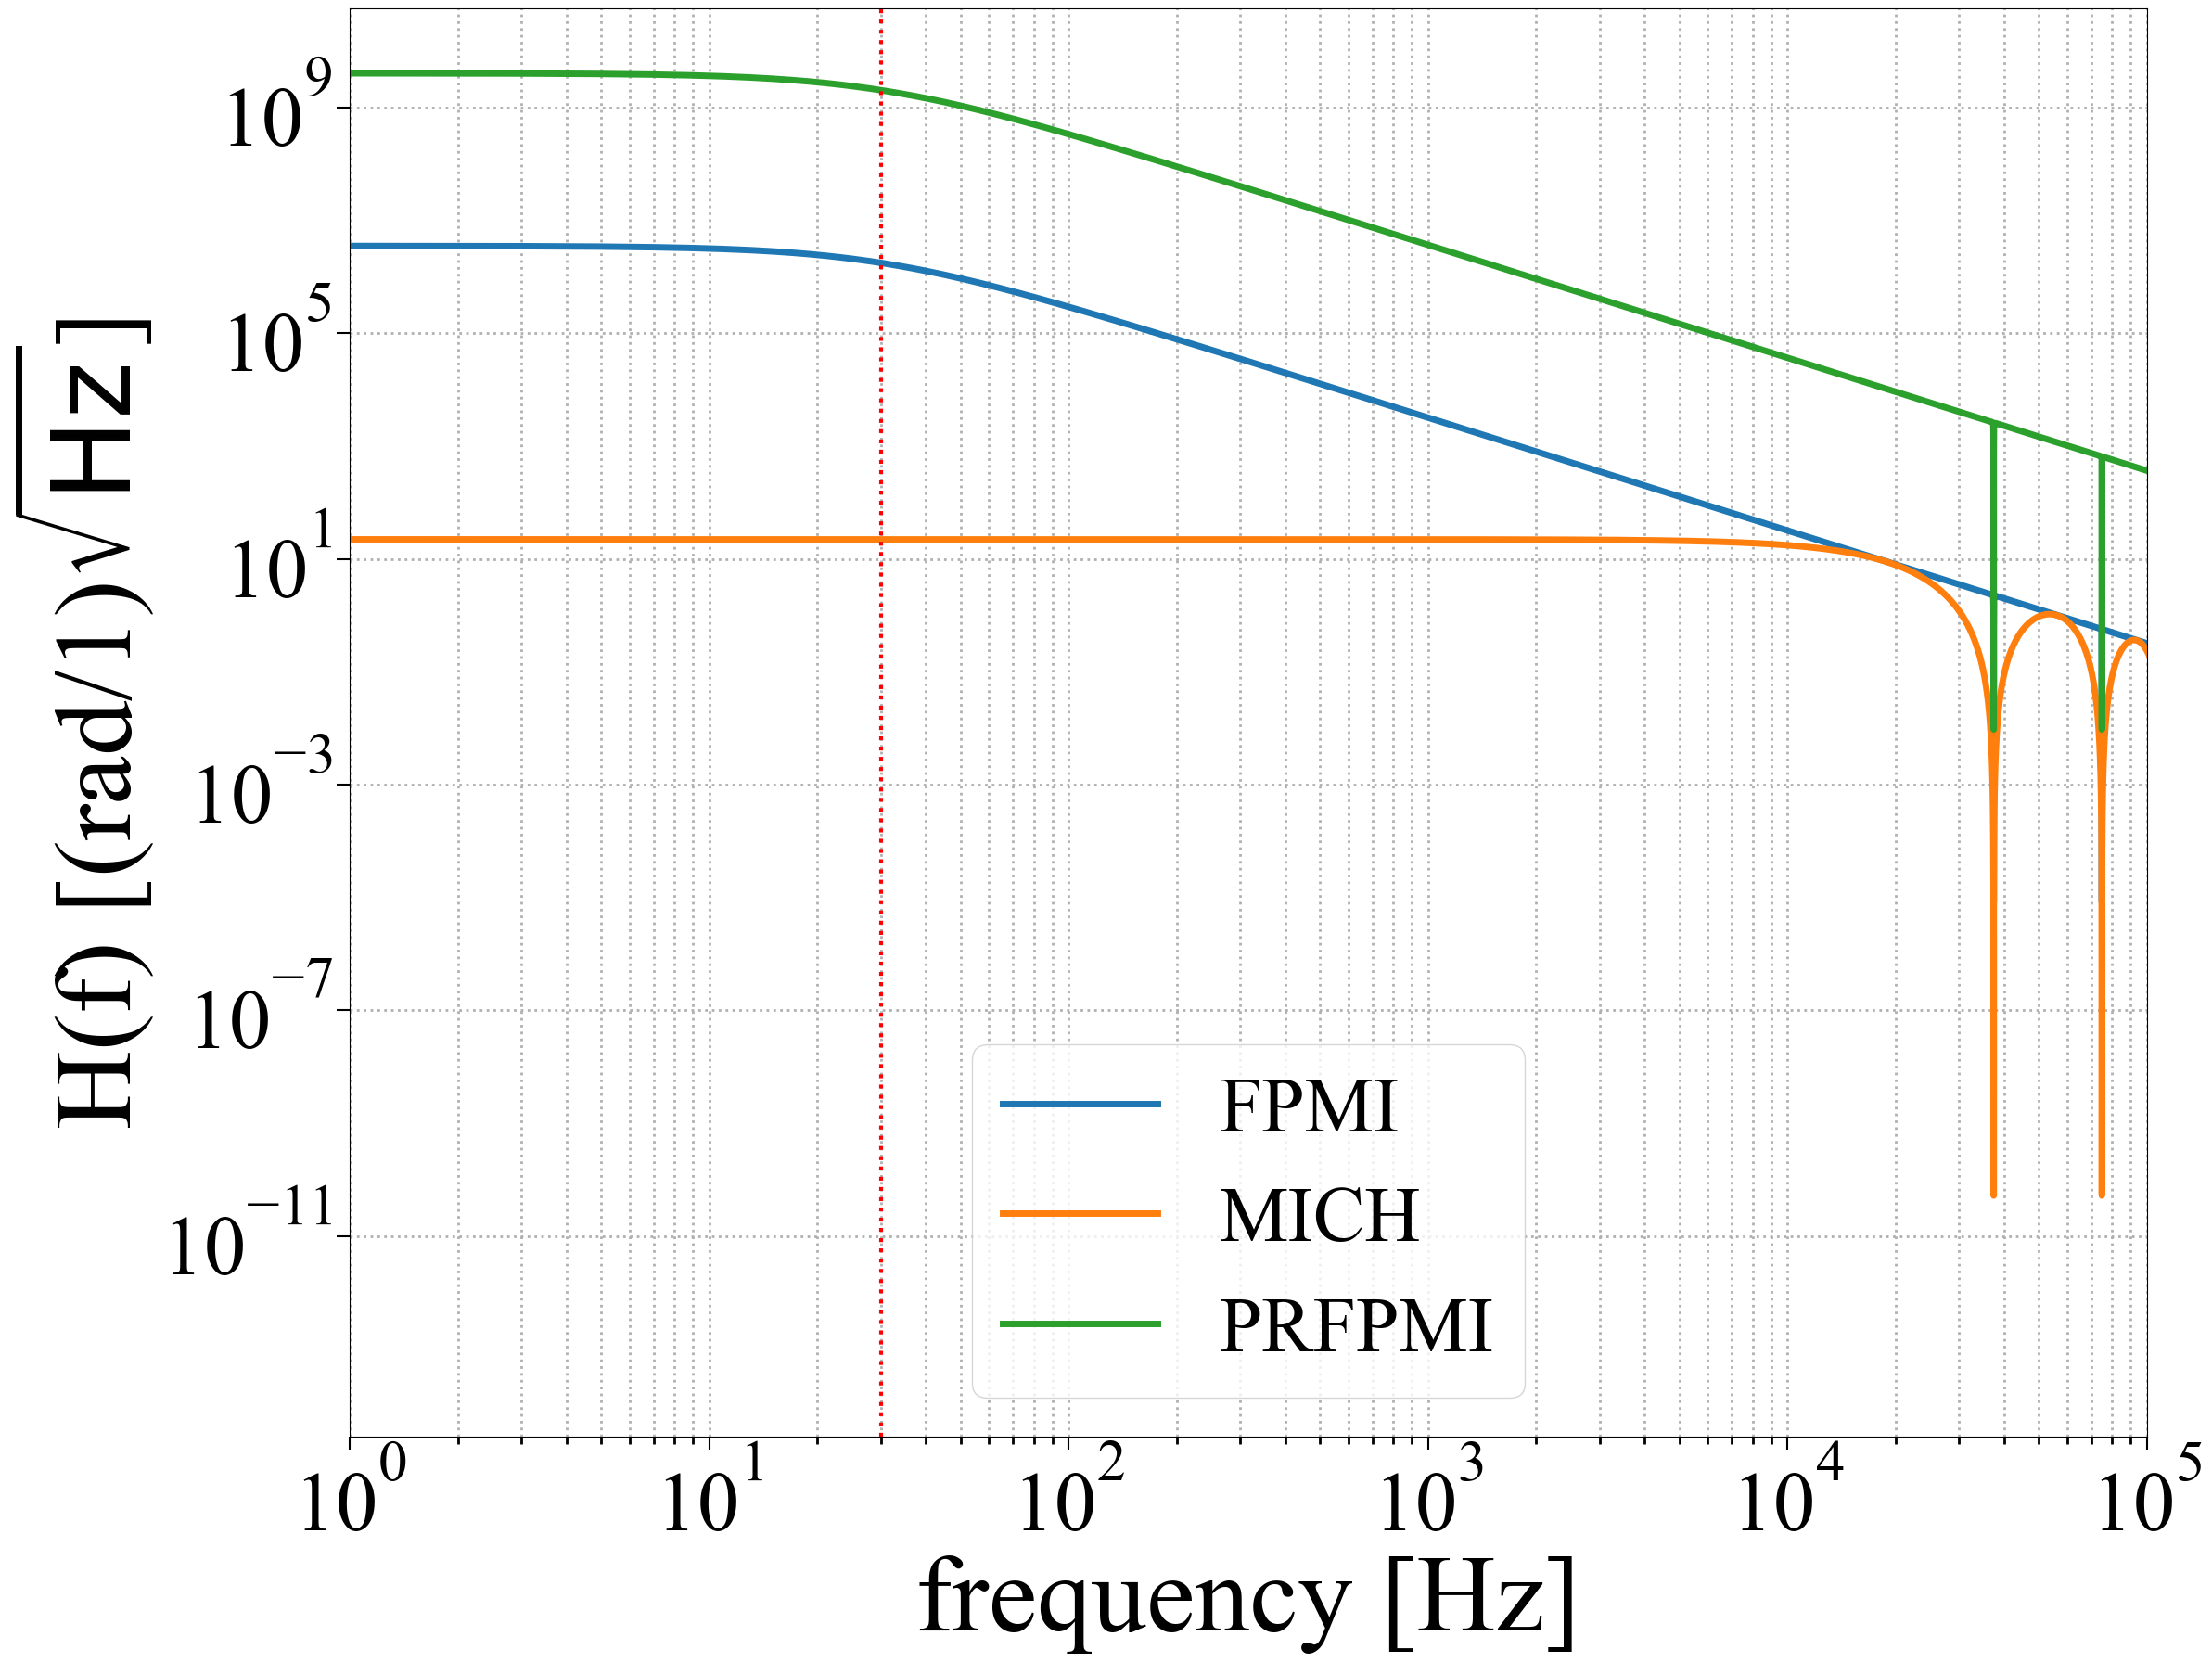

In [27]:
plt.loglog(nu,H_FPMI_modsq, label='FPMI', linewidth=5.0)
plt.loglog(nu,H_MI_modsq, label= 'MICH', linewidth= 5.0)
plt.loglog(nu,H_PRFPMI_modsq, label='PRFPMI', linewidth = 5.0)
plt.axvline (x=f_pole,ymin=1e-11, color='red', linestyle='dotted', linewidth=3)
#plt.ylim([10e-6, 10e7])
plt.xlim([1e0, 1e5])
plt.xlabel('frequency [Hz]')
plt.ylabel('H(f) [(rad/1)$\sqrt{\mathrm{Hz}}$]')
lgd=plt.legend()

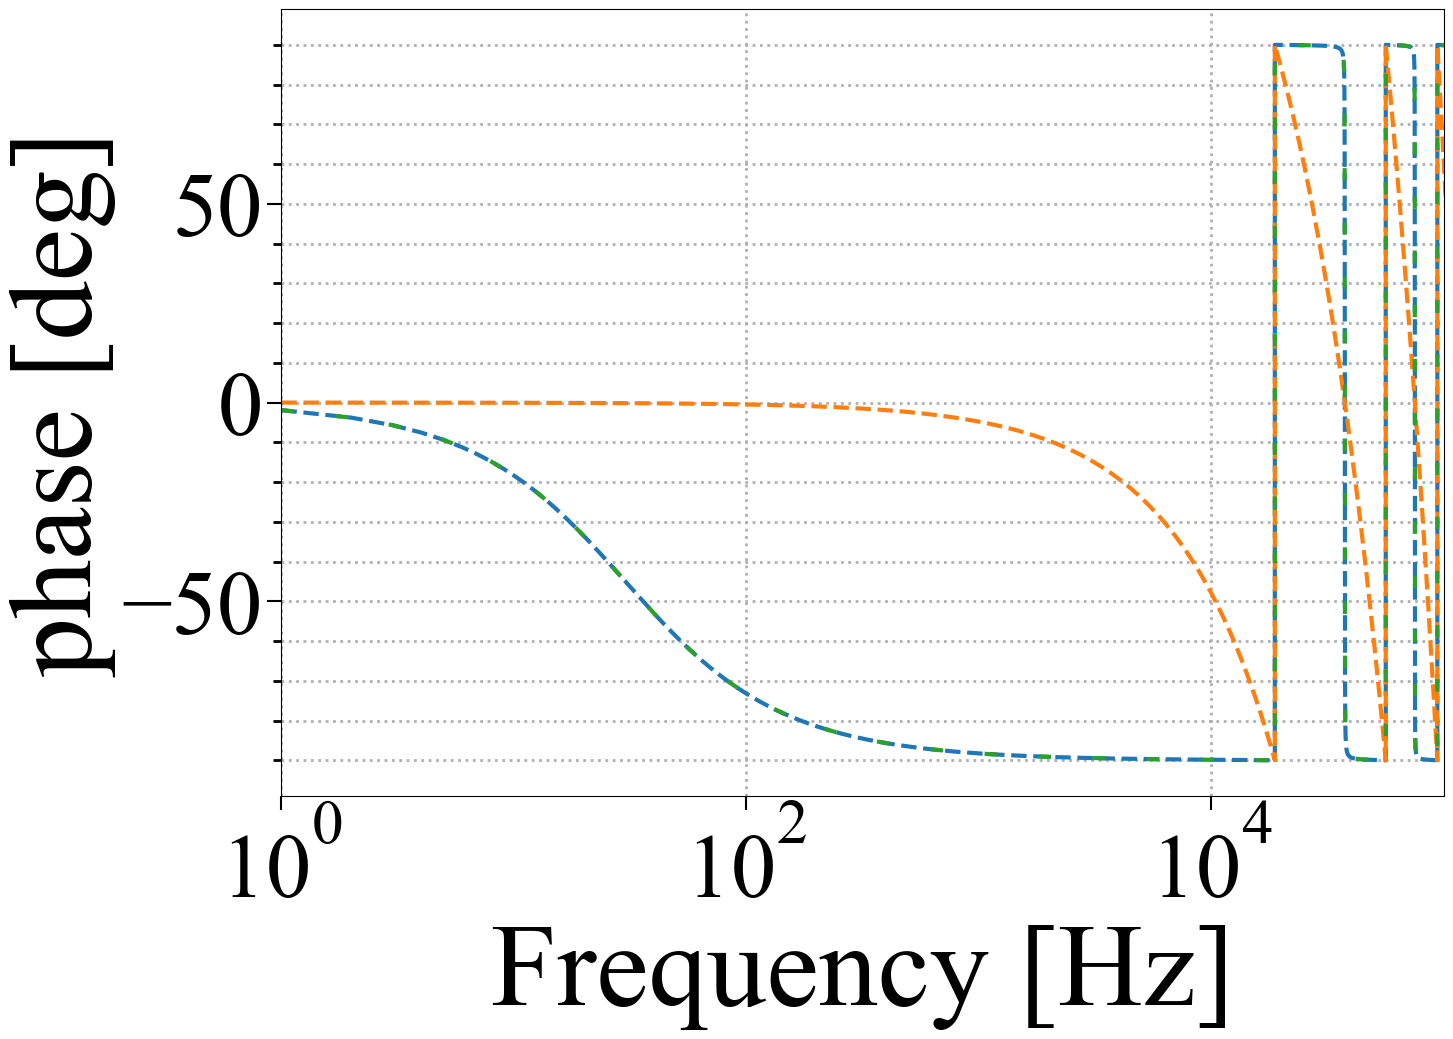

In [29]:
plt.figure(figsize=(15,10.22))
plt.xlim([1,100000])
plt.ylabel('phase [deg]')
plt.xlabel('Frequency [Hz]', )
plt.semilogx(nu,(180/np.pi)*np.arctan(np.imag(H_FPMI)/np.real(H_FPMI)),'--')
plt.semilogx(nu,(180/np.pi)*np.arctan(np.imag(H_MI)/np.real(H_MI)), '--')
plt.semilogx(nu,(180/np.pi)*np.arctan(np.imag(H_PRFPMI)/np.real(H_PRFPMI)),linestyle='--', linewidth=3.0,dashes=(3,10))

# SIGNAL RECYCLING